In [ ]:
# Mengimpor Library
import os
import shutil
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop

: 

In [17]:
# Menambahkan direktori
training_dir = './Dataset-Sign-Language/Data/'
validation_dir = 'Validation-Data'
os.makedirs(validation_dir, exist_ok=True)

In [18]:
# Data yang digunakan untuk validasi adalah 20% dari dataset.
val_set_portion = 0.2

In [19]:
# Splitting dataset
folder_names = ['A', 'B', 'C', 'D', 'E', 'F',
                'G', 'H', 'I', 'J', 'K', 'L',
                'M', 'N', 'O', 'P', 'Q', 'R',
                'S', 'T', 'U', 'V', 'W', 'X',
                'Y', 'Z']

for folder_name in folder_names:
    folder_path = os.path.join('./Dataset-Sign-Language/Data/', folder_name)
    val_dir_path = os.path.join(validation_dir, folder_name)
    os.makedirs(val_dir_path, exist_ok=True)

    # Mengecek jika Validation Directory kosong
    if len(os.listdir(val_dir_path)) == 0:
        files = os.listdir(folder_path)
        num_files = len(files)
        val_set_num = int(val_set_portion * num_files)

        # Shuffle files randomly
        shuffled_files = random.sample(files, len(files))

        # Memindahkan file ke Validation Directory
        for i in range(val_set_num):
            file_name = shuffled_files[i]
            file_path = os.path.join(folder_path, file_name)
            val_file_path = os.path.join(val_dir_path, file_name)
            shutil.move(file_path, val_file_path)

        print(f"{val_set_num} files moved from {folder_name} to validation directory.")

    else:
        print(f"Validation directory for {folder_name} is not empty. Skipping.")



12 files moved from A to validation directory.
8 files moved from B to validation directory.
12 files moved from C to validation directory.
12 files moved from D to validation directory.
12 files moved from E to validation directory.
12 files moved from F to validation directory.
8 files moved from G to validation directory.
12 files moved from H to validation directory.
12 files moved from I to validation directory.
12 files moved from J to validation directory.
12 files moved from K to validation directory.
12 files moved from L to validation directory.
12 files moved from M to validation directory.
10 files moved from N to validation directory.
12 files moved from O to validation directory.
12 files moved from P to validation directory.
10 files moved from Q to validation directory.
12 files moved from R to validation directory.
5 files moved from S to validation directory.
12 files moved from T to validation directory.
12 files moved from U to validation directory.
19 files moved f

In [47]:
train_data_gen = ImageDataGenerator(rescale=1/255,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   horizontal_flip=True
                                   )
training_generator = train_data_gen.flow_from_directory(training_dir,
                                                        target_size=(150,150),
                                                        batch_size=15,
                                                        class_mode='categorical')

val_data_gen = ImageDataGenerator(rescale=1/255)
validation_generator = val_data_gen.flow_from_directory(validation_dir,
                                                        target_size=(150,150),
                                                        batch_size=10,
                                                        class_mode='categorical')

Found 1270 images belonging to 26 classes.
Found 298 images belonging to 26 classes.


In [48]:
# Mendefiniskan fungsi callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            print("Akurasi telah mencapai 95%, menghentikan pelatihan.")
            self.model.stop_training = True
callbacks = myCallback()

In [49]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(26, activation='softmax')
])

In [50]:
model.compile(optimizer=RMSprop(learning_rate=0.0004),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 16)      

In [51]:
history = model.fit(training_generator,
          epochs=100,
          verbose=1,
          validation_data=validation_generator,
          callbacks=[callbacks])

Epoch 1/100
85/85 [==============================] - 75s 876ms/step - loss: 3.2590 - accuracy: 0.0520 - val_loss: 3.2416 - val_accuracy: 0.0671
Epoch 2/100
85/85 [==============================] - 99s 1s/step - loss: 3.2438 - accuracy: 0.0543 - val_loss: 3.2013 - val_accuracy: 0.0638
Epoch 3/100
85/85 [==============================] - 90s 1s/step - loss: 3.2083 - accuracy: 0.0756 - val_loss: 3.1417 - val_accuracy: 0.1242
Epoch 4/100
85/85 [==============================] - 66s 774ms/step - loss: 3.1341 - accuracy: 0.0961 - val_loss: 2.9772 - val_accuracy: 0.1812
Epoch 5/100
85/85 [==============================] - 65s 768ms/step - loss: 3.0420 - accuracy: 0.1362 - val_loss: 2.7882 - val_accuracy: 0.1644
Epoch 6/100
85/85 [==============================] - 66s 768ms/step - loss: 2.9583 - accuracy: 0.1449 - val_loss: 2.6035 - val_accuracy: 0.2987
Epoch 7/100
85/85 [==============================] - 66s 771ms/step - loss: 2.8198 - accuracy: 0.1984 - val_loss: 2.4893 - val_accuracy: 0.288

In [52]:
# Evaluasi model pada data validasi
evaluation = model.evaluate(validation_generator)
accuracy = evaluation[1]  # Mengambil nilai akurasi dari hasil evaluasi

print("Akurasi Keseluruhan: ", int(accuracy * 100), '%')


30/30 [==============================] - 6s 204ms/step - loss: 0.7175 - accuracy: 0.7416
Akurasi Keseluruhan:  74 %


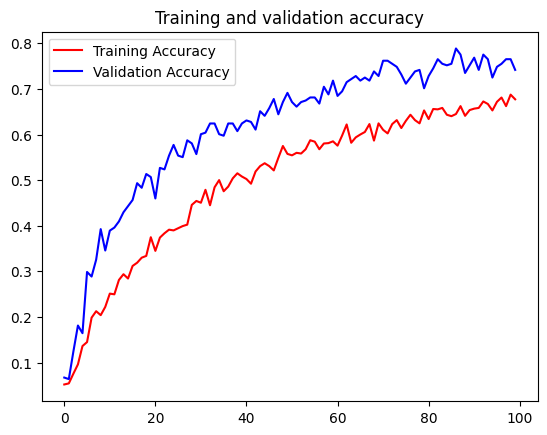

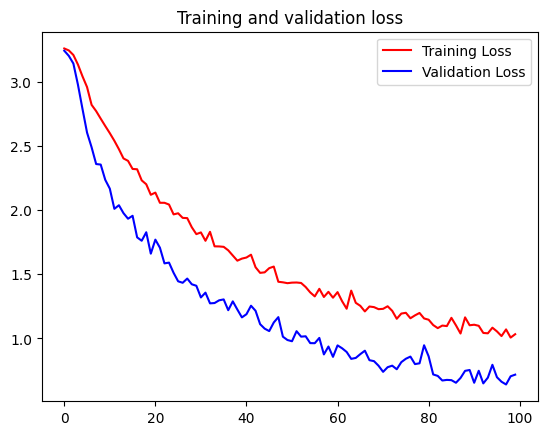

In [55]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

# Plot akurasi training dan validasi tiap epoch
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Plot loss training dan validasi tiap epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()
plt.show()
